In [1]:
#!pip install zfit==0.5.6 
#!pip install mplhep

In [2]:
#! pip install seaborn

In [3]:
from platform import python_version
print(python_version())

3.8.13


In [4]:
# Following https://stackoverflow.com/a/64604031
import sys, os

from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0] / "py")

if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
import matplotlib.pyplot as plt
import plot_tools
import zfit
import customPDFs
import numpy as np
import pandas as pd

2022-05-02 23:05:13.661774: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2022-05-02 23:05:13.661848: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-05-02 23:05:16.432955: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-02 23:05:16.433048: W tensorflow/stream_executor/cuda/cuda_driver.cc:312] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-02 23:05:16.433101: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-KJ9UEOTB): /proc/driver/nvidia/version does not exist
2022-05-02 23:05:16.433632: I tensorflow/core/platform/cpu_fe

# Importación de datos de varios tipos

- Se pudo importar sin problema el .csv
- Hubo problema de version para el archivo .pkl. Se intentó:
    - Bajar la versión de pandas a 1.2.5 para leer el archivo
    - Subir la versión de pandas a 1.4.2 para leer el archivo
    - Usar le paquete pickle5 en vez de pickle para leer el archivo

In [6]:
import pickle

In [7]:
data_path = str(Path.cwd().parents[0] / "test_datos" )

In [8]:
# Importando datos toys en .csv
data_csv_toys = pd.read_csv(data_path + "/c_toys.csv")

In [9]:
data_csv_toys

,0,1
0,0.189796,0.965831
1,0.401015,-0.757947
2,-0.390381,0.626843
3,0.561811,0.213402
4,0.211885,-0.424206
...,...,...
199995,-0.507659,-0.536955
199996,0.193938,-0.695873
199997,-0.621812,0.538620
199998,-0.587606,-0.120675


In [10]:
# Importando datos toys en .pkl

# La siguiente linea no funciona pues en python 3.7 hay conflictos con pkl de protocolo 5
# data_pkl_toys = pd.read_pickle(data_path + "/c_toys.pkl")

# Se usa un paquete externo
# import pickle5 as pickle

In [11]:
#!pip install pandas==1.2.5
#!pip install pandas==1.4.2

In [12]:
with open(data_path + "/c_toys.pkl", "rb") as fh:
  data_pkl_toys = pickle.load(fh)

In [13]:
data_pkl_toys = pd.read_pickle(data_path + "/c_toys.pkl")

In [14]:
data_pkl_toys

,0,1
0,0.189796,0.965831
1,0.401015,-0.757947
2,-0.390381,0.626843
3,0.561811,0.213402
4,0.211885,-0.424206
...,...,...
199995,-0.507659,-0.536955
199996,0.193938,-0.695873
199997,-0.621812,0.538620
199998,-0.587606,-0.120675


In [15]:
# Importando datos bins 2, 7 y 8 en .csv
data_csv_bin2 = pd.read_csv(data_path + "/Bin2.csv")
data_csv_bin7 = pd.read_csv(data_path + "/Bin7.csv")
data_csv_bin8 = pd.read_csv(data_path + "/Bin8.csv")

In [16]:
data_csv_bin2

,run,luminositiBlock,event,cosThetaKMu,DiMuMass
0,1,36751,3675004,0.621326,2.894994
1,1,36751,3675015,0.358723,2.522425
2,1,36751,3675022,0.017603,2.687217
3,1,36751,3675028,-0.789261,2.359973
4,1,36751,3675032,-0.214054,2.779243
...,...,...,...,...,...
853232,1,48135,4813472,-0.442256,2.766338
853233,1,48135,4813475,-0.319163,2.138131
853234,1,48135,4813477,-0.667584,2.251811
853235,1,48135,4813480,-0.100564,2.357103


In [17]:
data_csv_bin7

,run,luminositiBlock,event,cosThetaKMu,DiMuMass
0,1,36751,3675021,-0.889411,4.101584
1,1,36751,3675027,-0.637074,4.218907
2,1,36751,3675039,-0.515651,4.075568
3,1,36751,3675050,-0.142777,4.177622
4,1,36751,3675051,0.449763,4.167550
...,...,...,...,...,...
308639,1,48135,4813452,0.032087,4.149911
308640,1,48135,4813458,-0.626190,4.200086
308641,1,48135,4813460,-0.194521,4.069272
308642,1,48135,4813468,-0.597396,4.152590


In [18]:
data_csv_bin8

,run,luminositiBlock,event,cosThetaKMu,DiMuMass
0,1,36751,3675010,-0.239396,4.556437
1,1,36751,3675055,-0.584579,4.408696
2,1,36751,3675074,-0.022854,4.669693
3,1,36751,3675087,-0.281473,4.377927
4,1,36752,3675116,0.313822,4.260041
...,...,...,...,...,...
388414,1,48135,4813431,-0.622739,4.300850
388415,1,48135,4813436,0.279965,4.397760
388416,1,48135,4813441,0.227548,4.640008
388417,1,48135,4813470,-0.241801,4.369994


In [19]:
#Creación del observable
cos = zfit.Space('cosThetaKMu', [-1,1])

In [20]:
# Linspace para las gráficas
cos_np = np.linspace(-1, 1, 1000)

# Histogramas
## Para datos toys

In [21]:
#Separando en dos listas distintas
data_csv_toys1 = data_csv_toys.iloc[:,0]
data_csv_toys2 = data_csv_toys.iloc[:,1]

In [22]:
data_csv_toys1

0         0.189796
1         0.401015
2        -0.390381
3         0.561811
4         0.211885
            ...   
199995   -0.507659
199996    0.193938
199997   -0.621812
199998   -0.587606
199999   -0.690543
Name: 0, Length: 200000, dtype: float64

In [23]:
data_csv_toys2

0         0.965831
1        -0.757947
2         0.626843
3         0.213402
4        -0.424206
            ...   
199995   -0.536955
199996   -0.695873
199997    0.538620
199998   -0.120675
199999    0.505220
Name: 1, Length: 200000, dtype: float64

(array([ 2193.,  4592.,  7060.,  8901., 10657., 11898., 13143., 14158.,
        14496., 14766., 14724., 14678., 13708., 13017., 11742., 10307.,
         8260.,  6214.,  4135.,  1351.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <BarContainer object of 20 artists>)

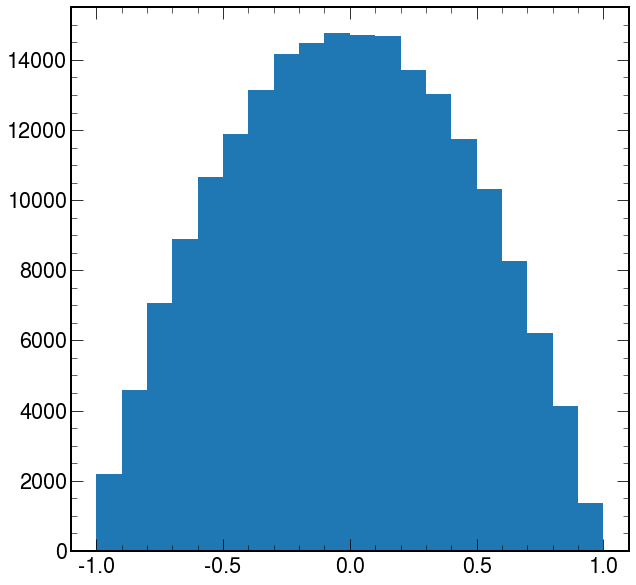

In [24]:
plt.hist(data_csv_toys1, bins=20, range=[-1,1])

(array([[ 2193.,  4592.,  7060.,  8901., 10657., 11898., 13143., 14158.,
         14496., 14766., 14724., 14678., 13708., 13017., 11742., 10307.,
          8260.,  6214.,  4135.,  1351.],
        [ 1058.,  3039.,  4694.,  6516.,  7725.,  9006., 10172., 11311.,
         12113., 12574., 12909., 13259., 13181., 13205., 13031., 12786.,
         12187., 11307., 10522.,  9405.]]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 2 BarContainer objects>)

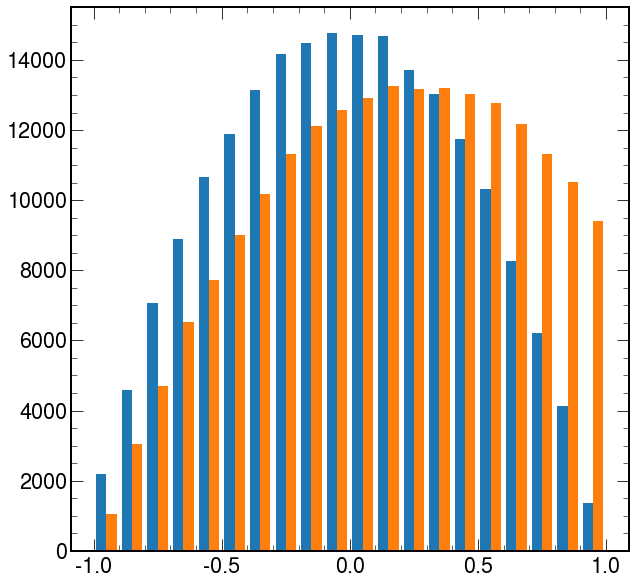

In [25]:
plt.hist(data_csv_toys, bins=20, range=[-1,1])

(array([ 1058.,  3039.,  4694.,  6516.,  7725.,  9006., 10172., 11311.,
        12113., 12574., 12909., 13259., 13181., 13205., 13031., 12786.,
        12187., 11307., 10522.,  9405.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <BarContainer object of 20 artists>)

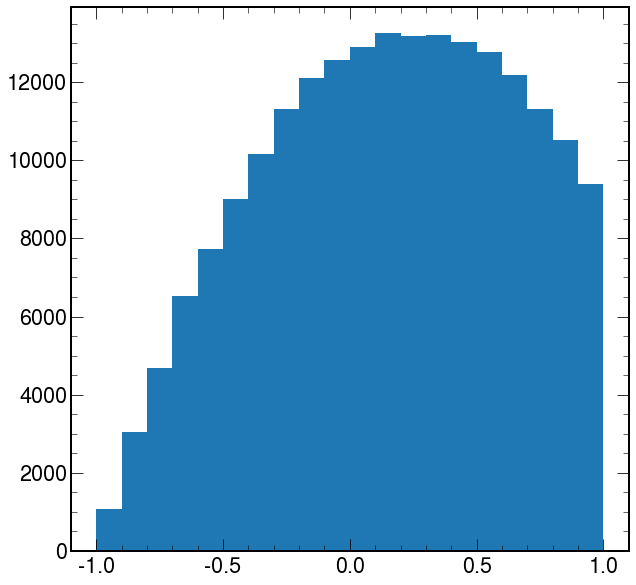

In [26]:
plt.hist(data_csv_toys2, bins=20, range=[-1,1])

## Para datos bin2

In [27]:
databin2 = data_csv_bin2.iloc[:,3:4]

(array([ 6661., 18174., 28435., 37218., 44167., 51177., 56024., 59824.,
        62364., 63533., 63430., 61961., 59251., 56238., 50872., 44413.,
        37022., 27975., 18042.,  6456.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <BarContainer object of 20 artists>)

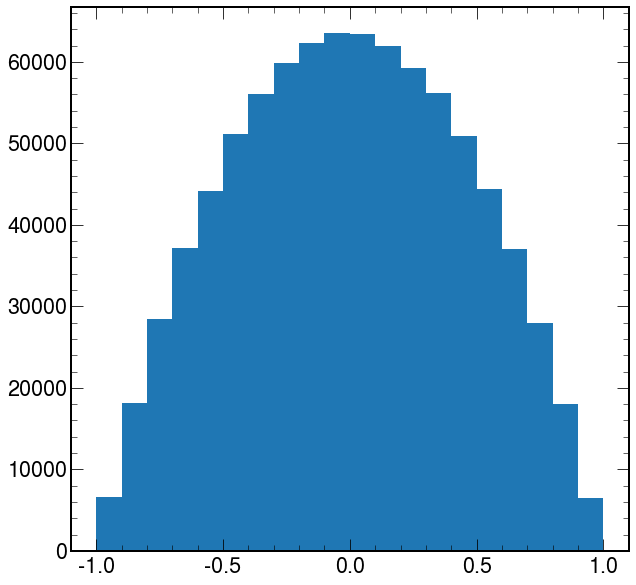

In [28]:
plt.hist(databin2, bins=20, range=[-1,1])

## Para datos bin7

In [29]:
databin7 = data_csv_bin7.iloc[:,3:4]

(array([ 2229.,  6424., 10132., 13495., 15860., 18376., 20209., 21404.,
        22619., 23000., 23114., 22615., 21662., 20382., 18256., 16357.,
        13416., 10311.,  6505.,  2278.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <BarContainer object of 20 artists>)

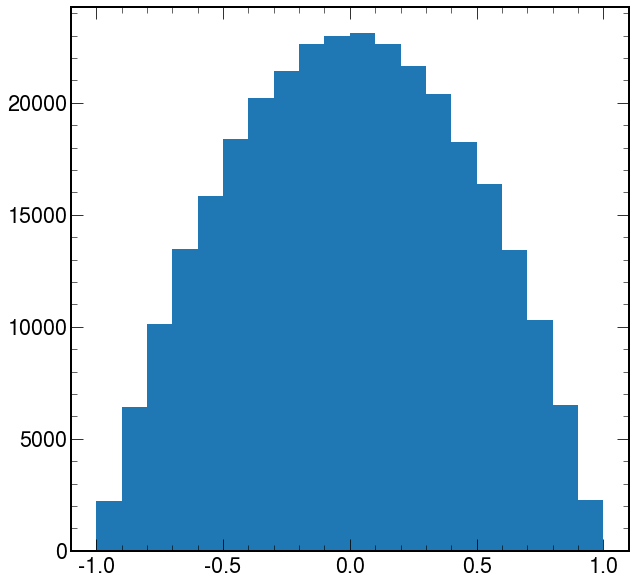

In [30]:
plt.hist(databin7, bins=20, range=[-1,1])

## Para datos bin8

In [31]:
databin8 = data_csv_bin8.iloc[:,3:4]

(array([ 2824.,  8123., 12546., 16716., 19999., 23113., 25399., 27138.,
        28399., 28860., 29015., 28867., 27441., 25616., 23407., 20352.,
        16766., 12773.,  8238.,  2827.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <BarContainer object of 20 artists>)

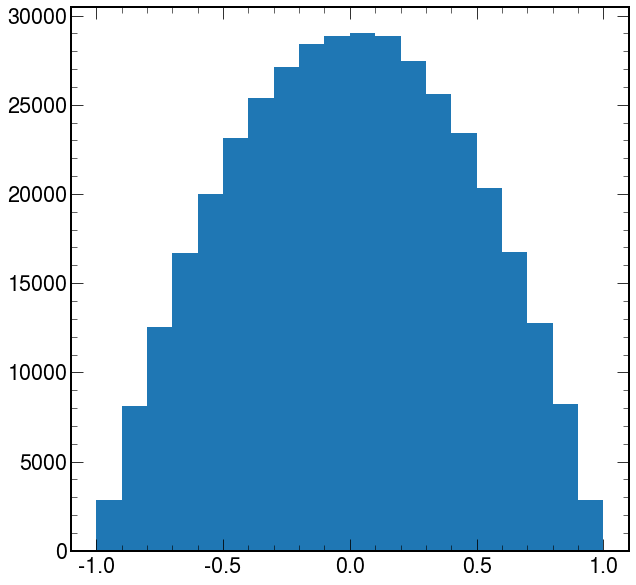

In [32]:
plt.hist(databin8, bins=20, range=[-1,1])

# Propuestas de AFB y FH

In [33]:
# Se define un decay rate con un AFB y FH iniciales

AFB = zfit.Parameter('AFB', 0)
FH = zfit.Parameter('FH', 0.002)

decay_rate = customPDFs.decayWidth(AFB, FH, cos)

Text(1, 0, '$\\cos\\theta_{\\ell}$')

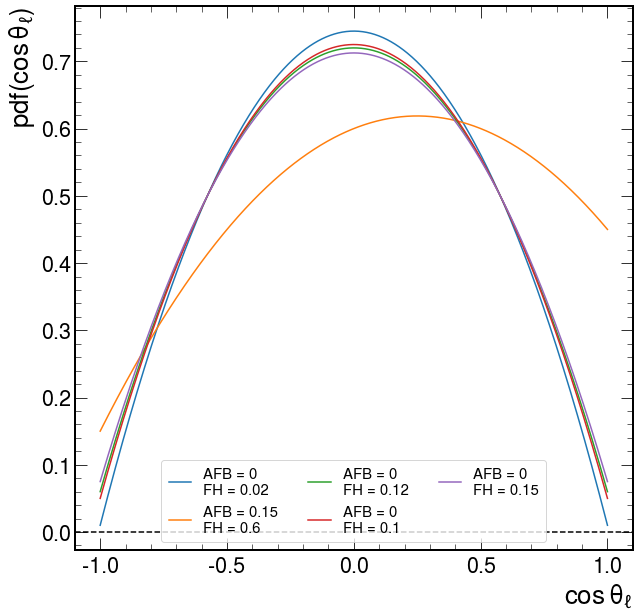

In [34]:
#afb_fh_pairs = zip([-0.5, 0, 0.5, -1, 3], 
                   #[1, 1, 1, 0.5, 2])

afb_fh_zip = zip([0, 0.15, 0, 0, 0], 
                   [0.02, 0.6, 0.12, 0.1, 0.15])

#print(afb_fh_pairs)
                 
for afb, fh in afb_fh_zip:
    AFB.set_value(afb)
    FH.set_value(fh)
    plt.plot(cos_np, decay_rate.pdf(cos_np), label=f'AFB = {afb}\nFH = {fh}')


AFB.set_value(0), FH.set_value(0.02)
#plt.plot(cos_np, decay_rate.pdf(cos_np), label=f'AFB = {0}\nFH = {0.02}', linewidth=5, color='black', ls='-')

plt.legend(frameon=True, ncol=3, fontsize=15)
plt.axhline(0, color='black', ls='--')
plt.ylabel(r'pdf($\cos\theta_{\ell}$)')
plt.xlabel(r'$\cos\theta_{\ell}$')

# Ajuste

In [35]:
afb_fh_pairs = [{'afb':0,'fh':0.02}, {'afb':0.15,'fh':0.6}, {'afb':0,'fh':0.12}, {'afb':0,'fh':0.1}, {'afb':0,'fh':0.15}]

In [36]:
import SLSQP_zfit

## Datos toys1

In [37]:
AFB.set_value(afb_fh_pairs[0]['afb']), FH.set_value(afb_fh_pairs[0]['fh'])

(<zfit.util.temporary.TemporarilySet at 0x7f075c50e4f0>,
 <zfit.util.temporary.TemporarilySet at 0x7f077c10dbb0>)

In [38]:
decay_rate.params

OrderedDict([('AFB', <zfit.Parameter 'AFB' floating=True value=0>),
             ('FH', <zfit.Parameter 'FH' floating=True value=0.02>)])

In [39]:
# Creación de las restricciones
constraints = SLSQP_zfit.create_constraint(decay_rate)
SLSQP = SLSQP_zfit.SLSQP()

0 1
ftol not in minizer_options


In [40]:
# Pasando los datos a zfit.Data

zf_data_csv_toys1 = zfit.Data.from_pandas(data_csv_toys1, cos)

In [41]:
nll = zfit.loss.UnbinnedNLL(decay_rate, zf_data_csv_toys1)

In [42]:
nll.value()

<tf.Tensor: shape=(), dtype=float64, numpy=115783.07233823542>

In [43]:
#Hacer el set value
#AFB.set_value(afb_fh_pairs[0]['afb']), FH.set_value(afb_fh_pairs[0]['fh'])
AFB.set_value(0), FH.set_value(0.5)

minimum = SLSQP.minimize(nll)
minimum.hesse()

OrderedDict([(<zfit.Parameter 'AFB' floating=True value=-0.02059>,
              {'error': 0.0010415268057801074}),
             (<zfit.Parameter 'FH' floating=True value=0.03563>,
              {'error': 0.002373238778001454})])

In [44]:
#Hacer el set value
AFB.set_value(0.1), FH.set_value(0.3)

MIN = zfit.minimize.Minuit()
minimum = MIN.minimize(nll)
minimum.hesse()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 1.156e+05                  │         Nfcn = 69 (69 total)         │
│ EDM = 1.59e-05 (Goal: 0.001)     │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘


OrderedDict([(<zfit.Parameter 'AFB' floating=True value=-0.02059>,
              {'error': 0.0010286863738073434}),
             (<zfit.Parameter 'FH' floating=True value=0.03562>,
              {'error': 0.0023435774797519837})])

## Datos toys2

In [45]:
AFB.set_value(afb_fh_pairs[1]['afb']), FH.set_value(afb_fh_pairs[1]['fh'])

(<zfit.util.temporary.TemporarilySet at 0x7f074a2a2850>,
 <zfit.util.temporary.TemporarilySet at 0x7f075c4bc6a0>)

In [46]:
decay_rate.params

OrderedDict([('AFB', <zfit.Parameter 'AFB' floating=True value=0.15>),
             ('FH', <zfit.Parameter 'FH' floating=True value=0.6>)])

In [47]:
# Creación de las restricciones
constraints = SLSQP_zfit.create_constraint(decay_rate)
SLSQP = SLSQP_zfit.SLSQP()

0 1
ftol not in minizer_options


In [48]:
# Pasando los datos a zfit.Data

zf_data_csv_toys2 = zfit.Data.from_pandas(data_csv_toys2, cos)

In [49]:
nll = zfit.loss.UnbinnedNLL(decay_rate, zf_data_csv_toys2)

In [50]:
nll.value()

<tf.Tensor: shape=(), dtype=float64, numpy=124733.99953398861>

In [51]:
AFB.set_value(0.1), FH.set_value(0.3)

minimum = SLSQP.minimize(nll)
minimum.hesse()

OrderedDict([(<zfit.Parameter 'AFB' floating=True value=0.2204>,
              {'error': 0.0015373750606559598}),
             (<zfit.Parameter 'FH' floating=True value=0.4417>,
              {'error': 0.0035519359429770844})])

In [52]:
AFB.set_value(0.1), FH.set_value(0.3)

MIN = zfit.minimize.Minuit()
minimum = MIN.minimize(nll)
minimum.hesse()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 1.221e+05                  │         Nfcn = 70 (70 total)         │
│ EDM = 3.04e-06 (Goal: 0.001)     │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘


OrderedDict([(<zfit.Parameter 'AFB' floating=True value=0.2204>,
              {'error': 0.0015337730454212208}),
             (<zfit.Parameter 'FH' floating=True value=0.4417>,
              {'error': 0.0035434818387536735})])

## Datos bin2 

In [53]:
AFB.set_value(afb_fh_pairs[2]['afb']), FH.set_value(afb_fh_pairs[2]['fh'])

(<zfit.util.temporary.TemporarilySet at 0x7f07481ced30>,
 <zfit.util.temporary.TemporarilySet at 0x7f07434c4b20>)

In [54]:
decay_rate.params

OrderedDict([('AFB', <zfit.Parameter 'AFB' floating=True value=0>),
             ('FH', <zfit.Parameter 'FH' floating=True value=0.12>)])

In [55]:
# Creación de las restricciones
constraints = SLSQP_zfit.create_constraint(decay_rate)
SLSQP = SLSQP_zfit.SLSQP()

0 1
ftol not in minizer_options


In [56]:
# Pasando los datos a zfit.Data

zf_data_csv_bin2 = zfit.Data.from_pandas(pd.DataFrame(data_csv_bin2.cosThetaKMu), cos)

In [57]:
nll = zfit.loss.UnbinnedNLL(decay_rate, zf_data_csv_bin2)

In [58]:
nll.value()

<tf.Tensor: shape=(), dtype=float64, numpy=491131.151848355>

In [59]:
AFB.set_value(0), FH.set_value(0.5)

minimum = SLSQP.minimize(nll)
minimum.hesse()

OrderedDict([(<zfit.Parameter 'AFB' floating=True value=-0.0008284>,
              {'error': 0.00045132496965785083}),
             (<zfit.Parameter 'FH' floating=True value=0.01071>,
              {'error': 0.001021867002609926})])

In [60]:
AFB.set_value(0), FH.set_value(0.5)

MIN = zfit.minimize.Minuit()
minimum = MIN.minimize(nll)
minimum.hesse()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 4.881e+05                  │         Nfcn = 54 (54 total)         │
│ EDM = 2.64e-05 (Goal: 0.001)     │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘


OrderedDict([(<zfit.Parameter 'AFB' floating=True value=-0.0008251>,
              {'error': 0.00045097358079723395}),
             (<zfit.Parameter 'FH' floating=True value=0.01071>,
              {'error': 0.0010210514622395258})])

## Datos bin7

In [61]:
AFB.set_value(afb_fh_pairs[3]['afb']), FH.set_value(afb_fh_pairs[3]['fh'])

(<zfit.util.temporary.TemporarilySet at 0x7f07405c6c40>,
 <zfit.util.temporary.TemporarilySet at 0x7f07405c6c70>)

In [62]:
decay_rate.params

OrderedDict([('AFB', <zfit.Parameter 'AFB' floating=True value=0>),
             ('FH', <zfit.Parameter 'FH' floating=True value=0.1>)])

In [63]:
# Creación de las restricciones
constraints = SLSQP_zfit.create_constraint(decay_rate)
SLSQP = SLSQP_zfit.SLSQP()

0 1
ftol not in minizer_options


In [64]:
# Pasando los datos a zfit.Data

zf_data_csv_bin7 = zfit.Data.from_pandas(pd.DataFrame(data_csv_bin7.cosThetaKMu), cos)

In [65]:
nll = zfit.loss.UnbinnedNLL(decay_rate, zf_data_csv_bin7)

In [66]:
nll.value()

<tf.Tensor: shape=(), dtype=float64, numpy=176711.5219880854>

In [67]:
AFB.set_value(0), FH.set_value(0.5)

minimum = SLSQP.minimize(nll)
minimum.hesse()

OrderedDict([(<zfit.Parameter 'AFB' floating=True value=0.0006802>,
              {'error': 0.0006812918659230201}),
             (<zfit.Parameter 'FH' floating=True value=0.003446>,
              {'error': 0.0015056591859598425})])

In [68]:
AFB.set_value(0), FH.set_value(0.5)

MIN = zfit.minimize.Minuit()
minimum = MIN.minimize(nll)
minimum.hesse()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 1.758e+05                  │         Nfcn = 70 (70 total)         │
│ EDM = 0.000139 (Goal: 0.001)     │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘


OrderedDict([(<zfit.Parameter 'AFB' floating=True value=0.0006761>,
              {'error': 0.0006817308442236505}),
             (<zfit.Parameter 'FH' floating=True value=0.003421>,
              {'error': 0.00150618852216028})])

## Datos bin8

In [69]:
AFB.set_value(afb_fh_pairs[4]['afb']), FH.set_value(afb_fh_pairs[4]['fh'])

(<zfit.util.temporary.TemporarilySet at 0x7f07381adbe0>,
 <zfit.util.temporary.TemporarilySet at 0x7f075c4bcd30>)

In [70]:
decay_rate.params

OrderedDict([('AFB', <zfit.Parameter 'AFB' floating=True value=0>),
             ('FH', <zfit.Parameter 'FH' floating=True value=0.15>)])

In [71]:
# Creación de las restricciones
constraints = SLSQP_zfit.create_constraint(decay_rate)
SLSQP = SLSQP_zfit.SLSQP()

0 1
ftol not in minizer_options


In [72]:
# Pasando los datos a zfit.Data

zf_data_csv_bin8 = zfit.Data.from_pandas(pd.DataFrame(data_csv_bin8.cosThetaKMu), cos)

In [73]:
nll = zfit.loss.UnbinnedNLL(decay_rate, zf_data_csv_bin8)

In [74]:
nll.value()

<tf.Tensor: shape=(), dtype=float64, numpy=223244.22829292715>

In [75]:
AFB.set_value(0), FH.set_value(0.5)

minimum = SLSQP.minimize(nll)
minimum.hesse()

OrderedDict([(<zfit.Parameter 'AFB' floating=True value=0.0008871>,
              {'error': 0.0005232953725524562}),
             (<zfit.Parameter 'FH' floating=True value=0.001609>,
              {'error': 0.0010900703590042563})])

In [76]:
AFB.set_value(0), FH.set_value(0.5)

MIN = zfit.minimize.Minuit()
minimum = MIN.minimize(nll)
minimum.hesse()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 2.208e+05                  │         Nfcn = 87 (87 total)         │
│ EDM = 2.42e-05 (Goal: 0.001)     │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘


Info: VariableMetricBuilder: no improvement in line search
Info: VariableMetricBuilder: machine accuracy limits further improvement.


OrderedDict([(<zfit.Parameter 'AFB' floating=True value=0.0008894>,
              {'error': 0.0005163602951819176}),
             (<zfit.Parameter 'FH' floating=True value=0.001616>,
              {'error': 0.0010721664232566951})])